Number of occurrences:
Good: 13818
Standard: 13982
Poor: 13093
Accuracy :  0.734963325183374
Mean Square Error :  0.16528117359413205
Confusion Matrix for each label : 
[[[2397  321]
  [ 196 1176]]

 [[2316  350]
  [ 569  855]]

 [[2522  274]
  [ 318  976]]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1372
           1       0.71      0.60      0.65      1424
           2       0.78      0.75      0.77      1294

   micro avg       0.76      0.74      0.75      4090
   macro avg       0.76      0.74      0.75      4090
weighted avg       0.76      0.74      0.74      4090
 samples avg       0.74      0.74      0.74      4090



/Users/nhannguyen/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nhannguyen/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


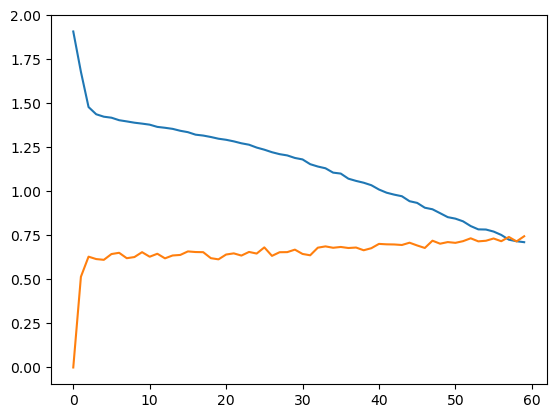

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score
from sklearn.neural_network import MLPClassifier

pd.set_option('display.max_columns', None)

df = pd.read_csv("../dataset/train_processed.csv")
df = df.drop(["Payment_Behaviour"], axis=1)

good = df[df["Credit_Score"] == "Good"]
standard = df[df["Credit_Score"] == "Standard"]
poor = df[df["Credit_Score"] == "Poor"]
standard = standard.sample(frac=0.6, random_state=3)
# poor = poor.sample(frac=0.8, random_state=20)

df = pd.concat([good, good, standard, poor])

good = df[df["Credit_Score"] == "Good"]
standard = df[df["Credit_Score"] == "Standard"]
poor = df[df["Credit_Score"] == "Poor"]

X = df.drop("Credit_Score", axis=1)
y = df["Credit_Score"]

print(f"Number of occurrences:\nGood: {good.shape[0]}\nStandard: {standard.shape[0]}\nPoor: {poor.shape[0]}")
scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler.fit_transform(X)
X = pd.DataFrame(data=X_rescaled, columns=X.columns)
categories=[["Good", "Standard", "Poor"]]
encoder = OneHotEncoder(categories=categories)
y = encoder.fit_transform(y.values.reshape(-1, 1))

data_train, data_test, class_train, class_test = train_test_split(X, y, test_size=0.1)
#50, 45, 37, 33, 27, 21, 17, 13, 10, 7, 4
mlp = MLPClassifier(solver="sgd", activation="relu", alpha=0.00035, learning_rate_init=0.1, batch_size=512, hidden_layer_sizes=(200, 180, 160, 140, 120, 100, 80, 60, 40, 20), max_iter=60, random_state=21, early_stopping=True)
mlp.fit(data_train, class_train)
pred = mlp.predict(data_test)

print("Accuracy : ", accuracy_score(class_test, pred.toarray()))
print("Mean Square Error : ", mean_squared_error(class_test.toarray(), pred.toarray()))

print("Confusion Matrix for each label : ")
print(multilabel_confusion_matrix(class_test, pred))

print("Classification Report : ")
print(classification_report(class_test, pred))

loss_values = mlp.loss_curve_
plt.plot(loss_values, label="loss")
plt.plot(mlp.validation_scores_, label="validation")

In [34]:
# Saving the model and preprocessing objectsgit 
import joblib
joblib.dump(mlp, "../model/mlp_model.pkl")
joblib.dump(scaler, "../model/scaler.pkl")
joblib.dump(encoder, "../model/encoder.pkl")

#Before we enter the input from the model, we need to scale the input from the user and encode the categorical data for the output of the model
"""
print(f"Number of occurrences:\nGood: {good.shape[0]}\nStandard: {standard.shape[0]}\nPoor: {poor.shape[0]}")
scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler.fit_transform(X)
X = pd.DataFrame(data=X_rescaled, columns=X.columns)
categories=[["Good", "Standard", "Poor"]]
encoder = OneHotEncoder(categories=categories)
y = encoder.fit_transform(y.values.reshape(-1, 1))
"""

'\nprint(f"Number of occurrences:\nGood: {good.shape[0]}\nStandard: {standard.shape[0]}\nPoor: {poor.shape[0]}")\nscaler = MinMaxScaler(feature_range=(0, 1))\nX_rescaled = scaler.fit_transform(X)\nX = pd.DataFrame(data=X_rescaled, columns=X.columns)\ncategories=[["Good", "Standard", "Poor"]]\nencoder = OneHotEncoder(categories=categories)\ny = encoder.fit_transform(y.values.reshape(-1, 1))\n'